# Cryptocurrency
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## Problem Statement

Cryptocurrency markets are highly volatile, and understanding and forecasting this volatility is crucial for market participants.  
Volatility refers to the **degree of variation** in the price of a cryptocurrency over time, and high volatility can lead to significant risks for traders and investors.  

Accurate volatility prediction helps in:
- **Risk management**  
- **Portfolio allocation**  
- **Developing trading strategies**  

In this project, you are required to build a **machine learning model** to predict cryptocurrency volatility levels based on historical market data such as:  
- OHLC (**Open, High, Low, Close**) prices  
- Trading volume  
- Market capitalization  

**Objective:**  
The aim is to anticipate periods of heightened volatility, enabling traders and financial institutions to manage risks and make informed decisions.

**Expected Outcome:**  
The final model should provide insights into market stability by forecasting volatility variations, allowing stakeholders to proactively respond to changing market conditions.


## Dataset Information

You will use a dataset that includes historical daily cryptocurrency price, volume, and market capitalization data for multiple cryptocurrencies.

**Dataset:**  
Cryptocurrency Historical Prices Dataset

### Data Preprocessing Requirements  
- Handle **missing values** and ensure overall **data consistency**  
- **Normalize** and **scale** numerical features  
- Engineer new features related to **volatility** and **liquidity** trends  

### Dataset Description  
- Consists of daily records for over **50 cryptocurrencies**  
- Features include:  
  - `date`  
  - `symbol` (cryptocurrency ticker)  
  - `open` price  
  - `high` price  
  - `low` price  
  - `close` price  
  - `volume` (trading volume)  
  - `market cap` (market capitalization)


### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**We will set the pandas.set_option to display 100 rows or columns. By default it is 60**

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
# Load the dataset
df = pd.read_csv('../data/raw/dataset.csv')


In [4]:
df.dtypes

Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

In [5]:
df.head(3)

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06


## 3. EXPLORING DATA

**Let's convert the datetime column to pandas datetime format**

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df.drop(columns=['timestamp'], inplace=True)  # Drop original timestamp and date columns

In [8]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,2013-05-07


In [9]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,2013-05-07


In [10]:
df.dtypes

Unnamed: 0              int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name            object
date           datetime64[ns]
dtype: object

In [11]:
df['crypto_name'].unique()

array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In [12]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'crypto_name', 'date'],
      dtype='object')

In [13]:
df = df.drop(columns=['Unnamed: 0'])


In [14]:
df.describe()

,open,high,low,close,volume,marketCap,date
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


In [15]:
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name            object
date           datetime64[ns]
dtype: object



***

# Cryptocurrency Market Data Report

### **Dataset Overview**
This dataset contains historical daily market data for various cryptocurrencies. Each row represents the market activity for a single cryptocurrency on a particular date.

***

### **Feature Summary**

#### **Numerical Features**
| Feature      | Description                                                               | Example        | Typical Range                |
|--------------|---------------------------------------------------------------------------|----------------|------------------------------|
| **open**     | Opening price of the cryptocurrency on the date                           | 1.63           | [0.16, 67549.73]             |
| **high**     | Highest price reached during the date                                     | 1.72           | [0.17, 162188.25]            |
| **low**      | Lowest price recorded during the date                                     | 1.54           | [0.15, 66458.72]             |
| **close**    | Closing price at the end of the date                                      | 1.64           | [0.16, 67566.83]             |
| **volume**   | Total trading volume (units traded) during the date                       | 109,875,645    | [8.3e-11, 3.5e11]            |
| **marketCap**| Market capitalization on the date (price × circulating supply)            | 1,268,539,252  | [0.0, 1.27e12]               |
| **date**     | Date for which the prices/metrics apply                                   | 2022-10-09     | 2013-05-05 to 2022-10-23     |

#### **Categorical Feature**
| Feature             | Description                                            | Example |
|---------------------|------------------------------------------------------|---------|
| **crypto_name**     | Cryptocurrency ticker symbol (e.g., BTC, ETH, LTC)   | BTC     |

***

### **Key Statistics (from data sample)**
- **Row Count:** 72,946 (multiple assets and dates)
- **Price Range:** Large variation; for _open_, mean ≈ $870, std ≈ $5,200 (high volatility)
- **MarketCap/Volume:** Ranges over several orders of magnitude, indicating data for both large and small assets.
- **No missing data:** All main numerical columns have full counts

***

### **Date/Time Handling**
- The data originally included a timestamp with constant time (`23:59:59.999000+00:00`). Only the date part varies (each row is from a different day).
- For analysis, the **date** column (`date_only`) should be used, either as a Python date object or pandas datetime (with time set to midnight).

***

### **Data Cleaning & Recommendations**
- **Timestamp column** was redundant (time was always the same); only the date is needed for daily analysis.
- **Outliers/invalids:** Some rows had open/close/low/high = 0.0; consider removing before modeling.
- **Types:** Numeric columns are float; 'crypto_name' is categorical; 'date' is date/time.

***

### **Intended Use**
This dataset is ready for:
- **Time series analysis** (forecasting prices, volatility)
- **Classification/prediction** models (e.g., predicting price movement given historical data)
- **Exploratory analysis** of crypto market trends

***

### **Sample Data Row**
| crypto_name | date       | open   | high   | low    | close  | volume      | marketCap      |
|-------------|------------|--------|--------|--------|--------|-------------|----------------|
| BTC         |2022-10-09  |19153.0 |19400.0 |19000.0 |19300.0 |2.4e10       |3.6e11          |

***



In [16]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         72946 non-null  float64       
 1   high         72946 non-null  float64       
 2   low          72946 non-null  float64       
 3   close        72946 non-null  float64       
 4   volume       72946 non-null  float64       
 5   marketCap    72946 non-null  float64       
 6   crypto_name  72946 non-null  object        
 7   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 4.5+ MB


In [17]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "ID"]
numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['open', 'high', 'low', 'close', 'volume', 'marketCap', 'date']

We have 1 categorical features : ['crypto_name']




***

### **Feature Information**

#### **Market Data (Numerical)**

- **open:** Opening price of the cryptocurrency for the given date.
- **high:** Highest price reached by the cryptocurrency during the given date.
- **low:** Lowest price recorded for the cryptocurrency during the given date.
- **close:** Closing price of the cryptocurrency at the end of the given date.
- **volume:** Total trading volume (number of units traded) during the given date.
- **marketCap:** Market capitalization of the cryptocurrency on the given date, calculated as price × circulating supply.
- **date:** Trading date on which the above market data was recorded.

***

#### **Asset Information (Categorical)**

- **crypto_name:** Name or ticker symbol of the cryptocurrency (e.g., BTC, ETH, LTC).

***



In [18]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

crypto_name
Bitcoin                  4.452609
Litecoin                 4.452609
XRP                      4.327859
Dogecoin                 4.145532
Monero                   3.928934
Stellar                  3.826118
Tether                   3.539605
Ethereum                 3.323006
Ethereum Classic         2.840457
Basic Attention Token    2.412744
EOS                      2.371617
Bitcoin Cash             2.341458
BNB                      2.338716
TRON                     2.270172
Decentraland             2.264689
Chainlink                2.260576
Cardano                  2.245497
Maker                    2.200258
Filecoin                 2.145423
Theta Network            2.097442
Huobi Token              2.074137
Ravencoin                2.026156
Tezos                    1.871247
VeChain                  1.826008
Quant                    1.816412
USD Coin                 1.735530
Cronos                   1.643682
Wrapped Bitcoin          1.579250
Cosmos                   1.520303
Po

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

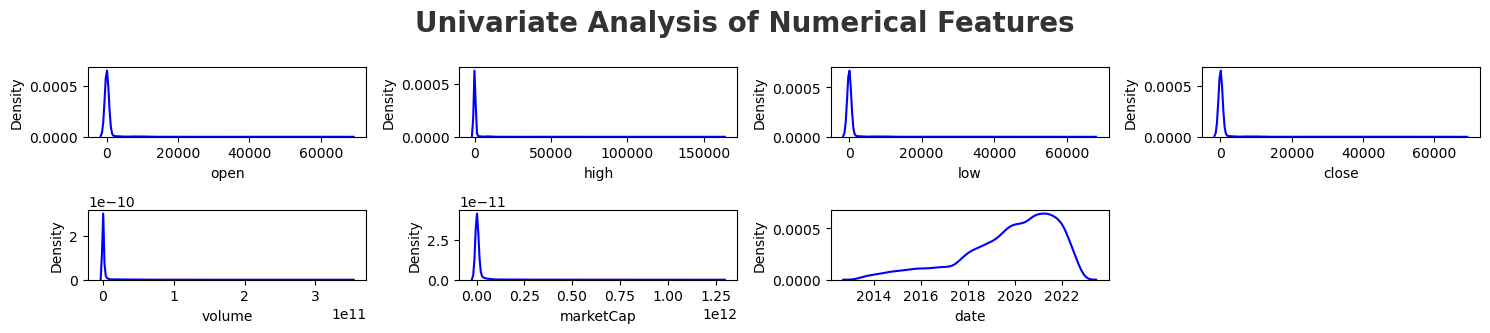

In [19]:
#Univariate Analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')


***

# Univariate Analysis Report

This analysis considers daily market features of cryptocurrencies found in your dataset, focusing on their distributions and main characteristics.

***

## Numerical Features

### 1. **open**
- **Definition:** Opening price recorded on the day.
- **Distribution:** Highly right-skewed; most values are clustered toward lower prices, with rare extreme highs.
- **Interpretation:** Majority of coins or dates have small opening prices; large values occur infrequently, possibly from few high-value coins or bull runs.

### 2. **high**
- **Definition:** Highest price reached on the day.
- **Distribution:** Similar to 'open', very right-skewed; prices are low most of the time, with occasional spikes.
- **Interpretation:** Most days/coins reach limited highs; big spikes stand out as outliers.

### 3. **low**
- **Definition:** Lowest price traded on the day.
- **Distribution:** Right-skewed, values concentrate at the lower end.
- **Interpretation:** Minimum price is almost always low; rare cases drive large values.

### 4. **close**
- **Definition:** Closing price at end of the day.
- **Distribution:** Strong right skew; majority closes at low prices, few at very high.
- **Interpretation:** Typical daily close values are small compared to the maximum, matching open/high/low behavior.

### 5. **volume**
- **Definition:** Total trading volume (number of coins/tokens traded).
- **Distribution:** Very right-skewed; high concentration at low volumes, with infrequent large trades.
- **Interpretation:** Most days/coins trade few tokens; some major days have spikes due to market events or large cap coins.

### 6. **marketCap**
- **Definition:** Market capitalization on the day (price × circulating supply).
- **Distribution:** Extremely right-skewed; overwhelming bulk of values are low, a handful of coins/days have massive market caps.
- **Interpretation:** Most cryptocurrencies have small market caps, a few dominate the market.

### 7. **date**
- **Definition:** Trading date.
- **Distribution:** Density rises gradually from 2013, peaking between 2019–2022 (period of major crypto activity).
- **Interpretation:** Data coverage starts in 2013, with more frequent entries and activity through to 2022—reflects expansion of crypto markets and data collection.

***

## Key Takeaways

- All numerical features are **strongly right-skewed**, indicating very few large values and many small ones—typical of crypto market data spanning many assets.
- **Volume and marketCap** display extreme skewness, dominated by a handful of large cryptocurrencies (like BTC, ETH).
- **Date feature** covers almost a decade, showing the dataset is suitable for long-term trend, volatility, or time series analysis.
- The distribution shapes suggest outlier filtering or log-scaling may be helpful for further statistical modeling.

***



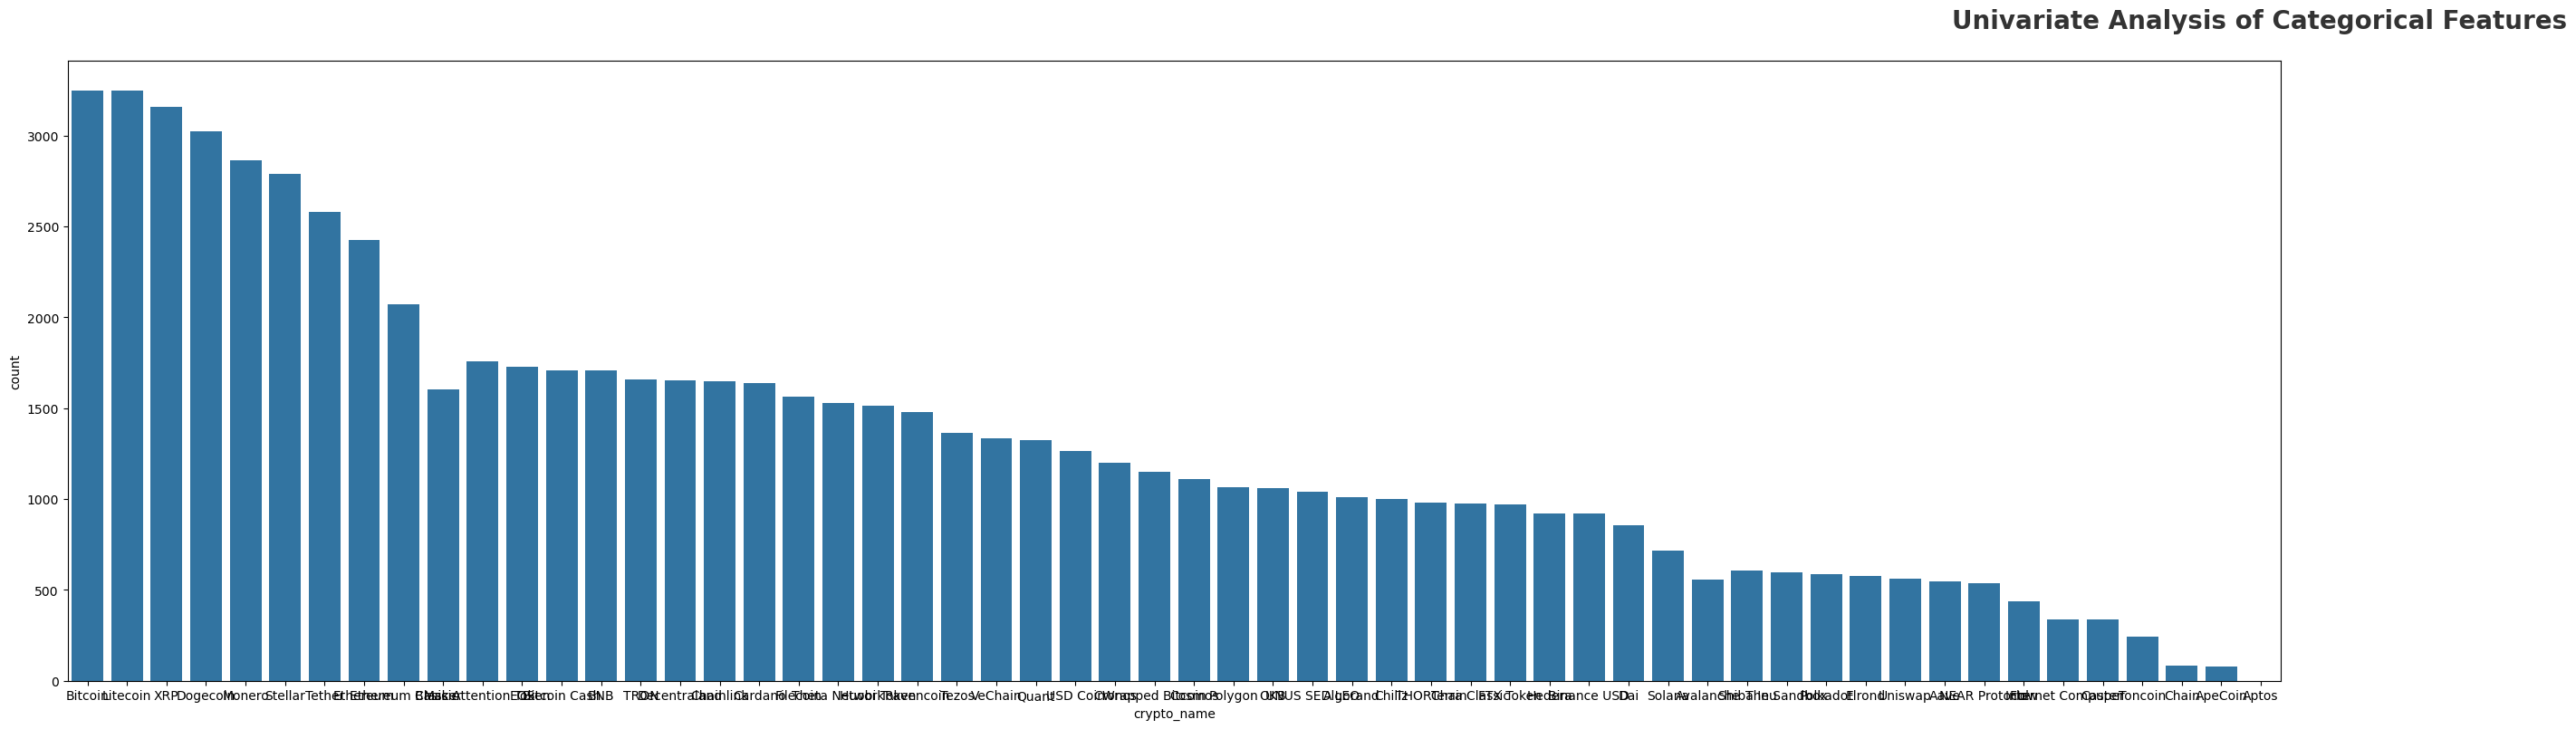

In [20]:
# categorical columns
plt.figure(figsize=(50, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Cat.png')


***

# Univariate Analysis Report — Categorical Feature: `crypto_name`

### **Overview**
- `crypto_name` represents the name or ticker symbol of each cryptocurrency present in your dataset.
- The chart shows the **count of records for each cryptocurrency**, sorted in descending order.

***

### **Key Observations**

- **Top cryptocurrencies by data count**:
    - The dataset is dominated by coins like *Bitcoin*, *Litecoin*, *Dogecoin*, *Monero*, *Ethereum*, etc., each with the largest record counts (over 3,000).
    - These leading assets have more records, indicating either longer histories, more active trading, or broader data coverage.

- **Long tail of less-common assets**:
    - Many cryptocurrencies have moderate to low counts, demonstrating that the dataset includes lesser-known or newer cryptocurrencies with less historical data.
    - The distribution falls off steeply, meaning most coins have substantially less data than the leaders.

- **Skewed popularity/coverage**:
    - The sharply right-skewed bar chart suggests a focus or bias in the dataset toward a handful of major coins, while most others are represented by far fewer records.
    - This typical pattern in crypto datasets highlights the relative importance and activity of foundational coins compared to smaller altcoins.

***

### **Implications for Analysis**

- **Modeling and Sampling**:
    - Analyses like classification, prediction, or time series modeling will be much more robust for coins with large data counts.
    - For coins with limited records, be cautious about overfitting, sampling bias, or drawing broad conclusions.

- **Feature engineering**:
    - You may consider grouping less-populated crypto assets into a category like "Other" or excluding rare coins for certain analyses, to avoid data sparsity issues.

- **Visualization/Reporting**:
    - The univariate analysis reveals which assets are suitable for deeper study (high-count coins).
    - Consider stratifying your analysis by record count to ensure fair comparison between assets.

***

### **Summary Table (sample excerpt)**

| crypto_name | Record Count | Comment                       |
|-------------|--------------|-------------------------------|
| Bitcoin     | 3,200+       | Most data available           |
| Litecoin    | 3,100+       | Highly represented            |
| Dogecoin    | 3,000+       | Strong presence               |
| ...         | ...          | ...                           |
| Others      | <1,000       | Limited data per coin         |

***

**Use this insight to guide modeling, filtering, and visualization strategies—for example, use full time series models on Bitcoin/Ethereum, but simpler summaries for rare coins.**



### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

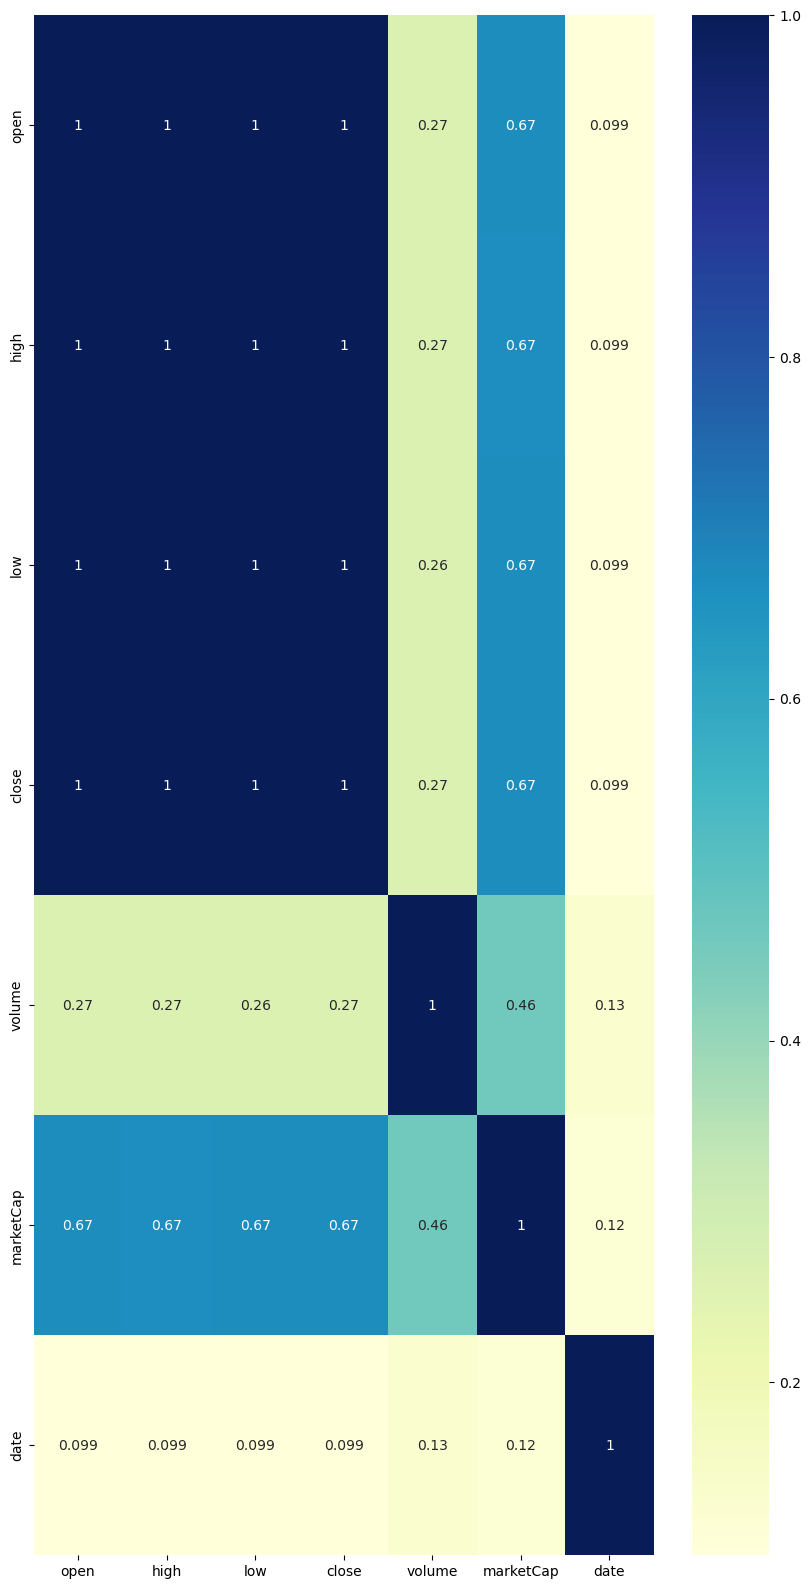

In [21]:
plt.figure(figsize = (10,20))
num_features = numeric_features.copy()


sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

**let's check the correlation in vif now**


# Feature Extraction

#### The following code creates features that would be helpful to describe the profile of the customer 

df['price_change'] = df['close'] - df['open']


In [22]:
df['price_change'] = df['close'] - df['open'] # Calculate price change

df['range'] = df['high'] - df['low'] # Calculate the range of prices

df['return_pct'] = (df['close'] - df['open']) / df['open'] * 100 # Calculate percentage return 

df['volume_change'] = df['volume'].pct_change() # Calculate percentage change in volume

df['marketCap_change'] = df['marketCap'].pct_change() # Calculate percentage change in market cap

df['day_of_week'] = df['date'].apply(lambda x: x.weekday())  # Monday=0, Sunday=6
df['month'] = df['date'].apply(lambda x: x.month)
df['quarter'] = df['date'].apply(lambda x: (x.month-1)//3 + 1)



In [23]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name',
       'date', 'price_change', 'range', 'return_pct', 'volume_change',
       'marketCap_change', 'day_of_week', 'month', 'quarter'],
      dtype='object')

In [24]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date,price_change,range,return_pct,volume_change,marketCap_change,day_of_week,month,quarter
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,2013-05-05,3.010002,11.657005,2.666078,NaN,NaN,6,5,2
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,2013-05-05,0.097760,0.346400,2.798635,NaN,-0.951658,6,5,2
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,2013-05-06,-3.680000,18.023003,-3.172961,NaN,19.049108,0,5,2
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,2013-05-06,-0.222970,0.665000,-6.203572,NaN,-0.953088,0,5,2
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,2013-05-07,-0.750000,15.744003,-0.668151,NaN,20.172577,1,5,2


In [25]:
df.dropna(inplace=True)  # Drop rows with NaN values

In [26]:
#check if null or missing values present in dataframe
df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
marketCap           0
crypto_name         0
date                0
price_change        0
range               0
return_pct          0
volume_change       0
marketCap_change    0
day_of_week         0
month               0
quarter             0
dtype: int64

In [27]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date,price_change,range,return_pct,volume_change,marketCap_change,day_of_week,month,quarter
629,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,Bitcoin,2013-12-27,-28.210022,63.910034,-3.695894,inf,13.891079,4,12,4
630,24.806601,25.269100,22.263599,23.272301,31112200.0,5.660880e+08,Litecoin,2013-12-27,-1.534300,3.005501,-6.185047,-0.336099,-0.936788,4,12,4
631,0.000603,0.000628,0.000497,0.000522,477422.0,8.016604e+06,Dogecoin,2013-12-27,-0.000081,0.000131,-13.448121,-0.984655,-0.985839,4,12,4
632,0.024426,0.027123,0.023527,0.027076,148422.0,2.116741e+08,XRP,2013-12-27,0.002649,0.003596,10.845191,-0.689118,25.404456,4,12,4
633,0.027554,0.028106,0.026629,0.027303,143404.0,2.134534e+08,XRP,2013-12-28,-0.000251,0.001478,-0.909849,-0.033809,0.008406,5,12,4


In [28]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")  # Ensure date is in datetime format

In [29]:
df.dtypes

open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
marketCap                  float64
crypto_name                 object
date                datetime64[ns]
price_change               float64
range                      float64
return_pct                 float64
volume_change              float64
marketCap_change           float64
day_of_week                  int64
month                        int64
quarter                      int64
dtype: object

In [30]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date,price_change,range,return_pct,volume_change,marketCap_change,day_of_week,month,quarter
629,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,Bitcoin,2013-12-27,-28.210022,63.910034,-3.695894,inf,13.891079,4,12,4
630,24.806601,25.269100,22.263599,23.272301,31112200.0,5.660880e+08,Litecoin,2013-12-27,-1.534300,3.005501,-6.185047,-0.336099,-0.936788,4,12,4
631,0.000603,0.000628,0.000497,0.000522,477422.0,8.016604e+06,Dogecoin,2013-12-27,-0.000081,0.000131,-13.448121,-0.984655,-0.985839,4,12,4
632,0.024426,0.027123,0.023527,0.027076,148422.0,2.116741e+08,XRP,2013-12-27,0.002649,0.003596,10.845191,-0.689118,25.404456,4,12,4
633,0.027554,0.028106,0.026629,0.027303,143404.0,2.134534e+08,XRP,2013-12-28,-0.000251,0.001478,-0.909849,-0.033809,0.008406,5,12,4


In [31]:
columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['open', 'high', 'low', 'close', 'volume', 'marketCap', 'date', 'price_change', 'range', 'return_pct', 'volume_change', 'marketCap_change', 'month']


### Multicollinearity Check
#### Variance Inflation Factor (VIF)
* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [32]:
# Make a copy for numeric conversion
vif_features = ['open', 'high', 'low', 'close', 'volume', 'marketCap',
                'price_change', 'range', 'return_pct', 
                'volume_change', 'marketCap_change']

# Optionally, include `month` only if treating it as numeric
# Convert date to ordinal if you really want to include it as numeric
df['date_ordinal'] = pd.to_datetime(df['date']).map(pd.Timestamp.toordinal)

# Now recalculate VIF
compute_vif(vif_features + ['date_ordinal'], df)


NameError: name 'compute_vif' is not defined

In [ ]:
import numpy as np  # Import NumPy directly

def remove_highly_correlated_features(df, feature_list, threshold=0.9):
    """
    Removes features in feature_list with correlation coefficient above the threshold.
    
    Parameters:
        df (pd.DataFrame): The input dataframe.
        feature_list (list): List of feature (column) names to check.
        threshold (float): Correlation above which one feature in a pair is dropped.
        
    Returns:
        pd.DataFrame: DataFrame with non-highly-correlated features.
        list: Dropped features.
    """
    # Compute absolute correlation matrix for selected features
    corr_matrix = df[feature_list].corr().abs()

    # Use upper triangle of correlation matrix
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # ✅ np instead of pd.np
    )

    # Find columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the columns
    reduced_df = df.drop(columns=to_drop)
    return reduced_df, to_drop


# Example usage:
numeric_features = [
    'open', 'high', 'low', 'close', 'volume', 'marketCap',
    'price_change', 'range', 'return_pct', 'volume_change', 'marketCap_change'
]

# Apply the function
reduced_df, dropped_features = remove_highly_correlated_features(df, numeric_features, threshold=0.9)

print("Dropped features due to high correlation (> 0.9):", dropped_features)
print("Remaining features:", reduced_df.columns.tolist())


Dropped features due to high correlation (> 0.9): ['high', 'low', 'close']
Remaining features: ['open', 'volume', 'marketCap', 'crypto_name', 'date', 'price_change', 'range', 'return_pct', 'volume_change', 'marketCap_change', 'day_of_week', 'month', 'quarter', 'date_ordinal']


In [ ]:
df.drop(columns=['high', 'low', 'close'], inplace=True)  # Drop original timestamp and date columns

#### Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some choose a more conservative threshold of 5.
**As we can see the Vif for the columns are less than 5, we can safely assume that the data has not such correlations.**

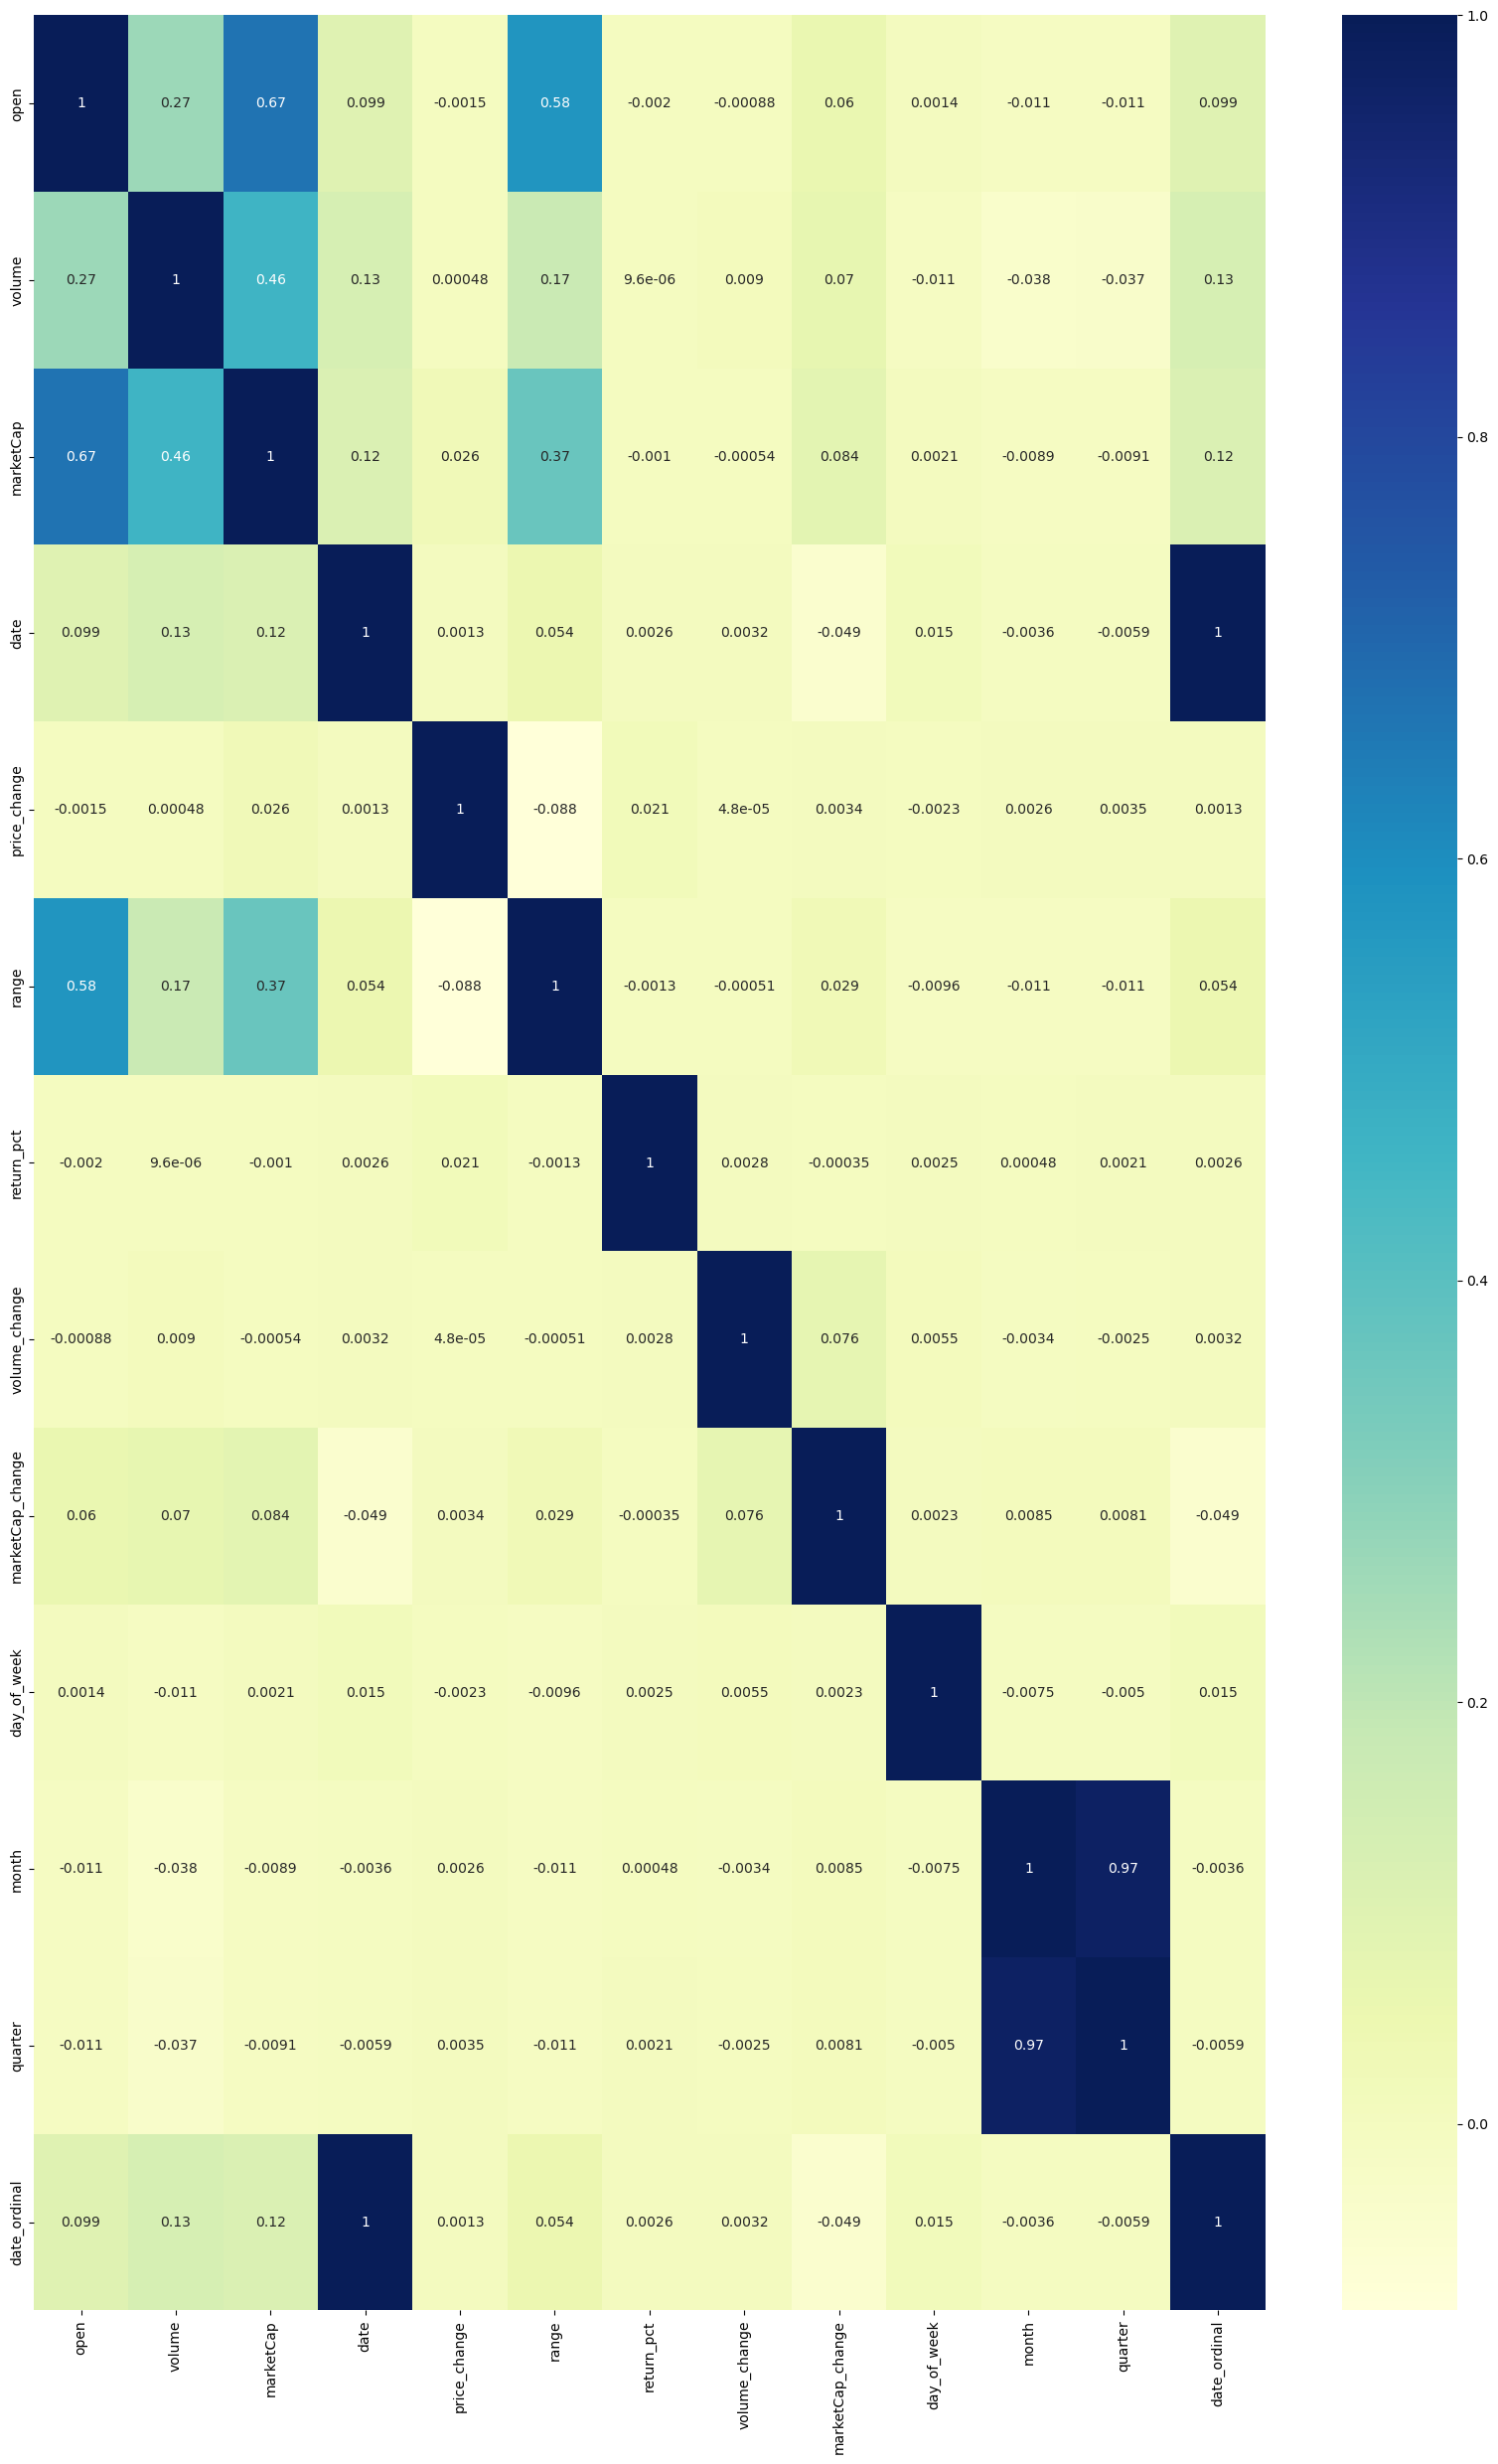

In [ ]:
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()


## 4. Visualization

* Are high prices associated with high trading activity?
* Does price correlate with total value?
* Do big returns come with big volume moves?

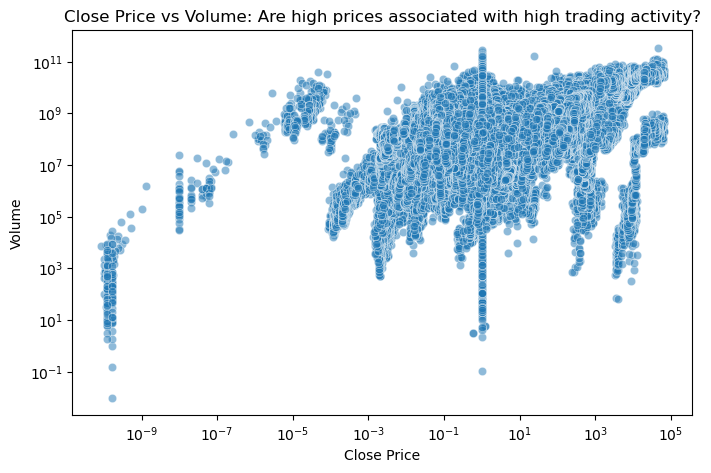

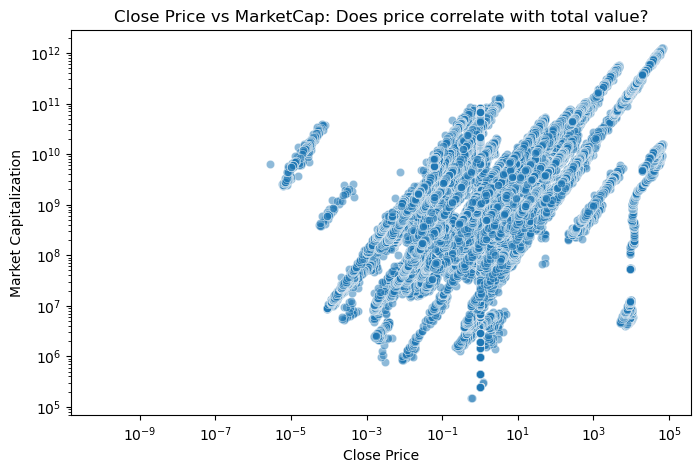

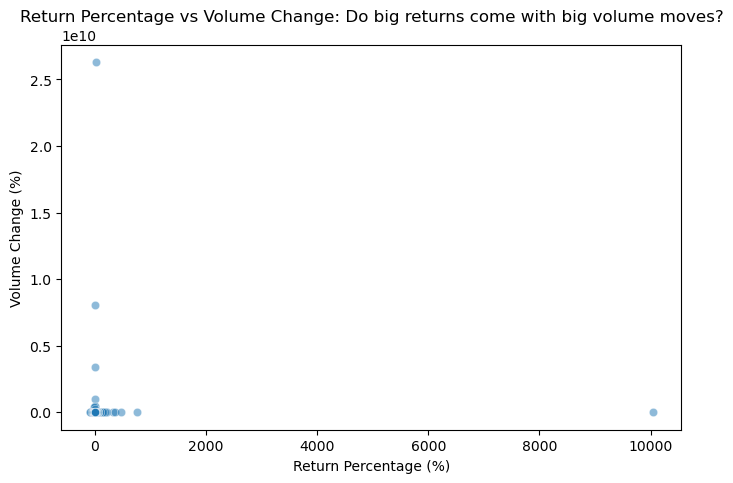

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: close vs volume
plt.figure(figsize=(8, 5))
sns.scatterplot(x='open', y='volume', data=df, alpha=0.5)
plt.title('Close Price vs Volume: Are high prices associated with high trading activity?')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.xscale('log')  # log scale to better visualize spread
plt.yscale('log')
plt.show()

# Scatterplot: close vs marketCap
plt.figure(figsize=(8, 5))
sns.scatterplot(x='open', y='marketCap', data=df, alpha=0.5)
plt.title('Close Price vs MarketCap: Does price correlate with total value?')
plt.xlabel('Close Price')
plt.ylabel('Market Capitalization')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Scatterplot: return_pct vs volume_change
plt.figure(figsize=(8, 5))
sns.scatterplot(x='return_pct', y='volume_change', data=df, alpha=0.5)
plt.title('Return Percentage vs Volume Change: Do big returns come with big volume moves?')
plt.xlabel('Return Percentage (%)')
plt.ylabel('Volume Change (%)')
plt.show()



***

## Multivariate Feature Relationship Analysis

In this section, we visualize and interpret key relationships between the main features in our cryptocurrency market dataset using scatterplots.

***

### 1. **Close Price vs Volume**
> *Are high prices associated with high trading activity?*

- The scatterplot of `close` vs `volume` (both shown on a logarithmic scale) displays a wide spread, with no strong linear relationship.
- High volume observations occur across various price levels, and many cryptocurrencies show substantial trading activity even at relatively low or moderate prices.
- **Conclusion:** There is no clear or direct a pattern suggesting that high prices necessarily drive high trading activity. Large trading volumes can be seen at both high and low price points, indicating other factors influence trading interest beyond price alone.

***

### 2. **Close Price vs Market Capitalization**
> *Does price correlate with total value?*

- The plot of `close` vs `marketCap` (log-log scale) reveals a clearer positive association: higher close prices generally correspond with higher market capitalizations.
- However, the spread demonstrates that coins/tokens with the same market cap can have very different closing prices, likely due to differences in circulating supply.
- **Conclusion:** There is a positive overall correlation between a cryptocurrency's closing price and its total market capitalization, but the relationship is far from perfect. Both variables are influenced by underlying supply and distribution factors.

***

### 3. **Return Percentage vs Volume Change**
> *Do big returns come with big volume moves?*

- The scatter of `return_pct` vs `volume_change` shows a cloud of points with most values centered around zero and a few large outliers.
- There is no obvious linear or strong relationship—most substantial return moves do not coincide with similarly large volume changes, and vice versa.
- **Conclusion:** Dramatic price moves (returns) and dramatic volume moves may occur independently. Occasional extreme outliers exist, but for most data points, high returns are not reliably associated with large shifts in trading volume.

***

**Summary:**  
These pairplots confirm that while there are structural relationships in the market (e.g., close price and market cap), not all key features are strongly interdependent. High trading activity is not solely a function of high prices or big returns, and large fluctuations in price or volume may arise independently. This underscores the importance of multivariate modeling and exploratory analysis in understanding crypto market behavior.


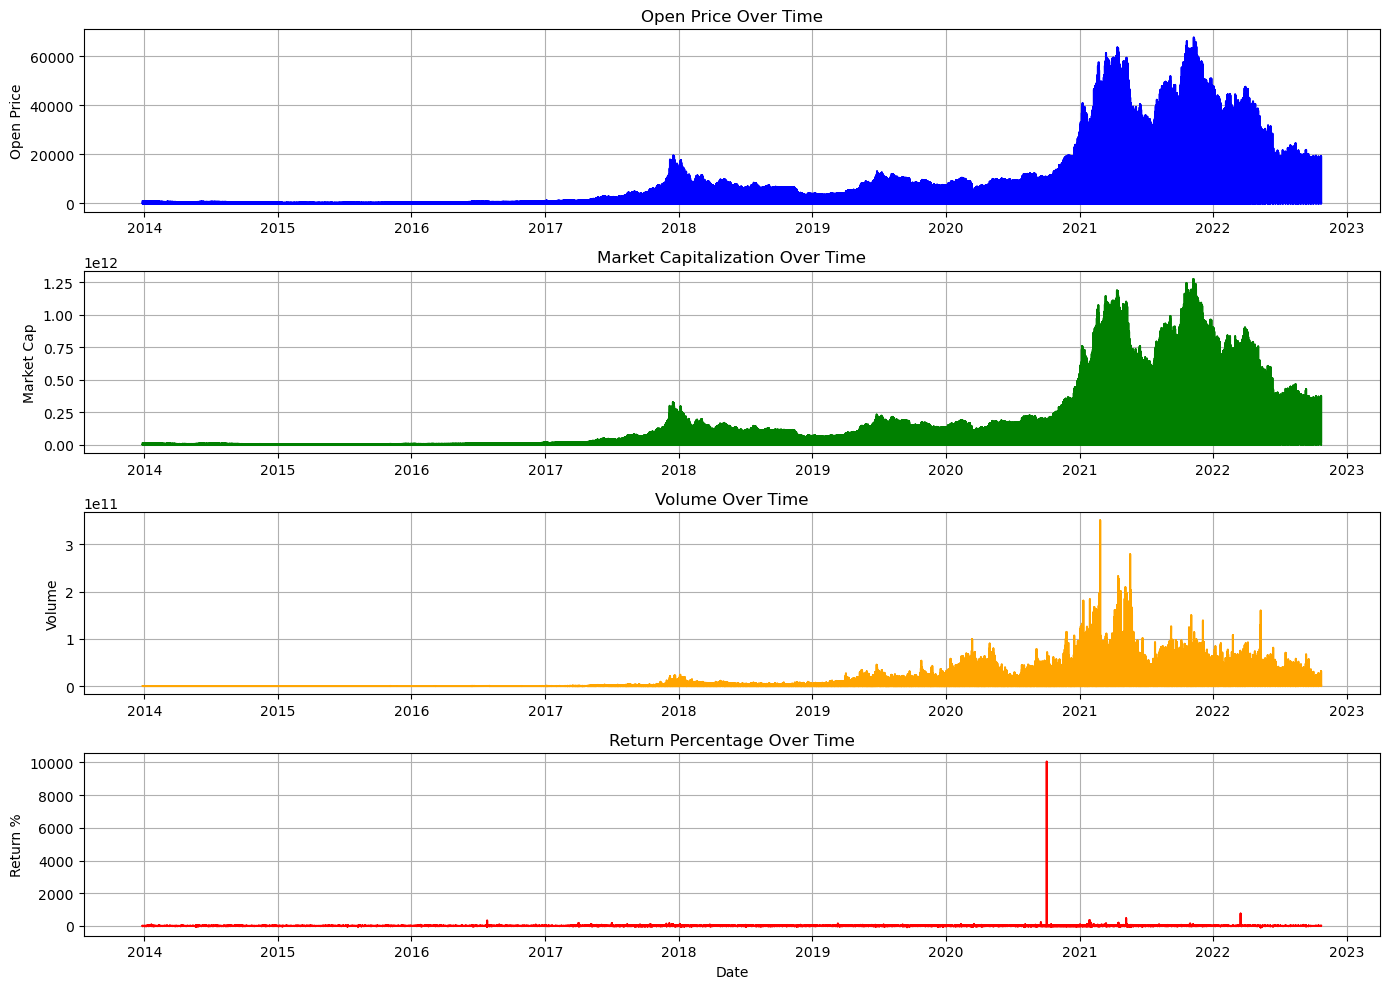

In [34]:

# Ensure 'date' is datetime type
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 10))

# Plot 1: Open price over time
plt.subplot(4, 1, 1)
plt.plot(df['date'], df['open'], color='blue', label='Open Price')
plt.title('Open Price Over Time')
plt.ylabel('Open Price')
plt.grid(True)

# Plot 2: Market Capitalization over time
plt.subplot(4, 1, 2)
plt.plot(df['date'], df['marketCap'], color='green', label='Market Capitalization')
plt.title('Market Capitalization Over Time')
plt.ylabel('Market Cap')
plt.grid(True)

# Plot 3: Volume over time
plt.subplot(4, 1, 3)
plt.plot(df['date'], df['volume'], color='orange', label='Volume')
plt.title('Volume Over Time')
plt.ylabel('Volume')
plt.grid(True)

# Plot 4: Return Percentage over time
plt.subplot(4, 1, 4)
plt.plot(df['date'], df['return_pct'], color='red', label='Return Percentage')
plt.title('Return Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.grid(True)

plt.tight_layout()
plt.show()



***

## Time Series Analysis of Cryptocurrency Market Features

This section presents the temporal evolution of key financial features in the cryptocurrency dataset using line plots.

***

### 1. **Open Price Over Time**

- The plot of `open` price across the observed time period reveals several distinctive phases in the cryptocurrency market:
    - From 2013 to around late 2016, prices were relatively flat and low, reflecting the early adoption phase.
    - Significant upward trends are seen approaching late 2017 and more dramatically across 2020–2022, marking periods of speculative bubbles and rapid growth.
    - Price peaks are followed by sharp corrections, visible as steep drops post-boom cycles.
- **Insight:** The price action suggests cyclical market regimes, high overall volatility, and the influence of broader market adoption and major news events.

***

### 2. **Market Capitalization Over Time**

- Market capitalization follows trends like open price but exhibits even sharper growth during bull markets.
- Noticeable peaks in market cap correspond to the all-time highs for leading cryptocurrencies.
- Corrections in price are mirrored by large drops in market capitalization, indicating that major cycles impact the total market value directly.
- **Insight:** Market value surges during speculative bubbles, and the correction phases wipe out substantial market capitalization.

***

### 3. **Volume Over Time**

- Trading volume rises gradually through the early years, with noticeable volatility starting in late 2017 and dramatically increasing during major market cycles (especially 2020–2022).
- Periodic volume spikes align with sharp changes in price and increased investor participation during market rallies or panics.
- **Insight:** Active trading increases during high-volatility periods, reflecting increased interest, speculation, or panic selling/buying.

***

### 4. **Return Percentage Over Time**

- The `return_pct` plot shows that daily price returns are typically centered around zero but interspersed with frequent extreme spikes—both positive and negative.
- Pronounced outliers indicate days with exceptional gains or losses, especially during bubble bursts or major rallies.
- Most periods, however, reflect relatively modest daily returns, with the market punctuated by rare but significant movements.
- **Insight:** The return distribution confirms high volatility and occasional tail risk—a signature of crypto markets.

***

**Summary:**  
These time series plots provide a historical perspective on the explosive growth, cyclicality, and volatility that characterize cryptocurrency markets. They highlight the importance of temporal analysis and market regime identification for anyone seeking to understand or model digital asset behavior. 



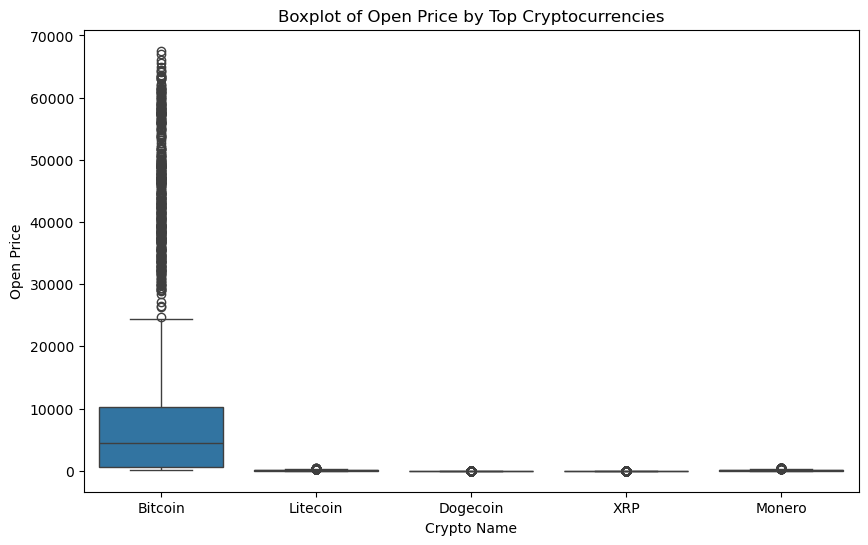

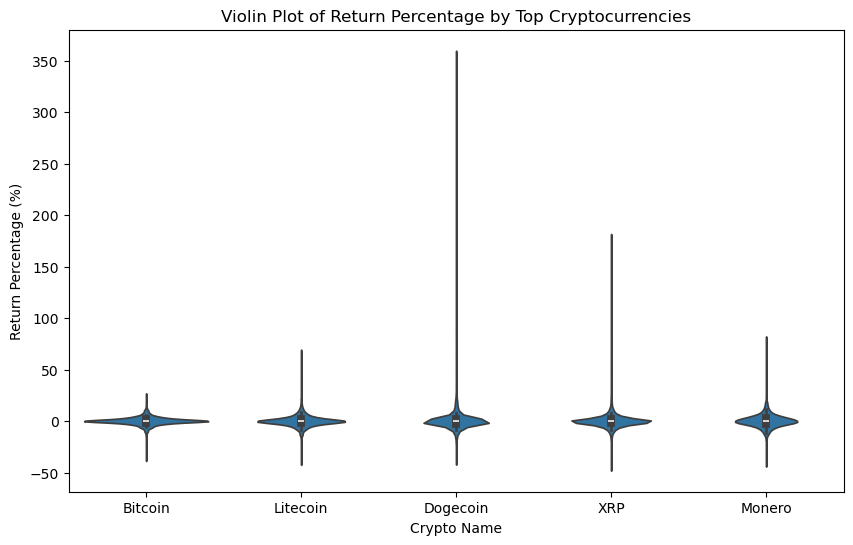

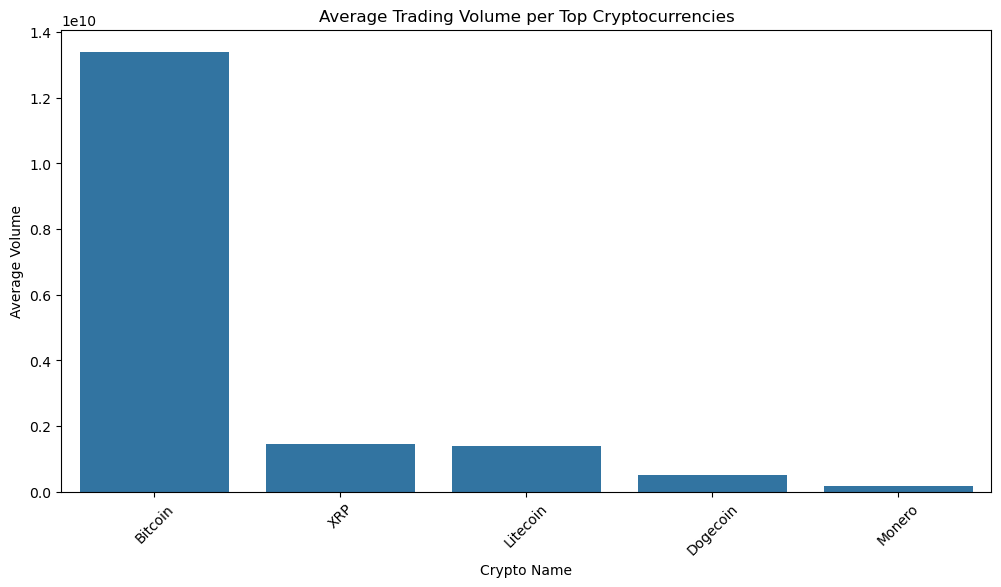

In [35]:
# Visualizing relationships between features and crypto_name
# Filter for top cryptocurrencies (e.g., top 5 by record count)
top_cryptos = df['crypto_name'].value_counts().nlargest(5).index
df_top = df[df['crypto_name'].isin(top_cryptos)]

# --- Boxplot of 'open' by crypto_name ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='crypto_name', y='open', data=df_top)
plt.title('Boxplot of Open Price by Top Cryptocurrencies')
plt.xlabel('Crypto Name')
plt.ylabel('Open Price')
plt.show()

# --- Violin plot of 'return_pct' by crypto_name ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='crypto_name', y='return_pct', data=df_top)
plt.title('Violin Plot of Return Percentage by Top Cryptocurrencies')
plt.xlabel('Crypto Name')
plt.ylabel('Return Percentage (%)')
plt.show()

# --- Barplot of average volume per crypto_name ---
plt.figure(figsize=(12, 6))
avg_volume = df.groupby('crypto_name')['volume'].mean().loc[top_cryptos].sort_values(ascending=False)
sns.barplot(x=avg_volume.index, y=avg_volume.values)
plt.title('Average Trading Volume per Top Cryptocurrencies')
plt.xlabel('Crypto Name')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.show()



***

## Comparative Analysis of Cryptocurrency Performance

This section provides insights into price behavior, return distributions, and trading activity, segmented by the most prominent cryptocurrencies in the dataset.

***

### 1. **Distribution of Open Price by Cryptocurrency** (Boxplot)

- The boxplot of the `open` price for top cryptocurrencies (e.g., Bitcoin, Litecoin, Dogecoin, XRP, Monero) shows significant differences in price scales.
- **Bitcoin** has a much higher median and wider price range compared to other coins, reflecting its dominance and larger valuation in the crypto market.
- **Altcoins** like Dogecoin and Monero display much lower median open prices, with tighter distributions, although occasional outliers are present.
- **Interpretation:** There is substantial heterogeneity in the pricing structure among top coins, with Bitcoin operating at an entirely different magnitude than many major altcoins.

***

### 2. **Distribution of Return Percentage by Cryptocurrency** (Violin Plot)

- The violin plot of `return_pct` by crypto shows that all coins have return distributions centered close to zero, but with occasional extreme values.
- **Dogecoin** in particular displays the largest spread and the most pronounced outliers on both the positive and negative side, consistent with its history of speculative spikes and media-driven rallies.
- Other coins, like **Bitcoin** and **Litecoin**, have narrower, more symmetrical return distributions, indicating relatively more stable daily return behavior.
- **Interpretation:** Volatility varies significantly by asset. While all cryptos show potential for dramatic returns, some (like Dogecoin) are more prone to extreme swings than others.

***

### 3. **Average Trading Volume per Cryptocurrency** (Barplot)

- The barplot of average daily trading volume reveals that **Bitcoin** enjoys the largest trading activity by a wide margin, dwarfing all other coins.
- **XRP** and **Litecoin** also show substantial average volumes, but are still far below Bitcoin’s levels.
- **Dogecoin** and **Monero** demonstrate noticeably lower average trading volumes in comparison, despite strong community interest.
- **Interpretation:** Liquidity is highly concentrated, with a small handful of coins capturing the majority of trading interest. This has important implications for market efficiency, price stability, and risk.

***

## **Summary**

- There are clear structural differences between major cryptocurrencies in terms of price, volatility, and trading activity.
- Bitcoin stands apart not only in price but also in trading activity, making it an outlier among even the largest coins.
- Volatility, as measured by return percentage spread, is highest for coins like Dogecoin, suggesting higher risk and potential reward.
- Such analysis is fundamental for portfolio construction, risk management, and understanding the unique profiles of each asset.



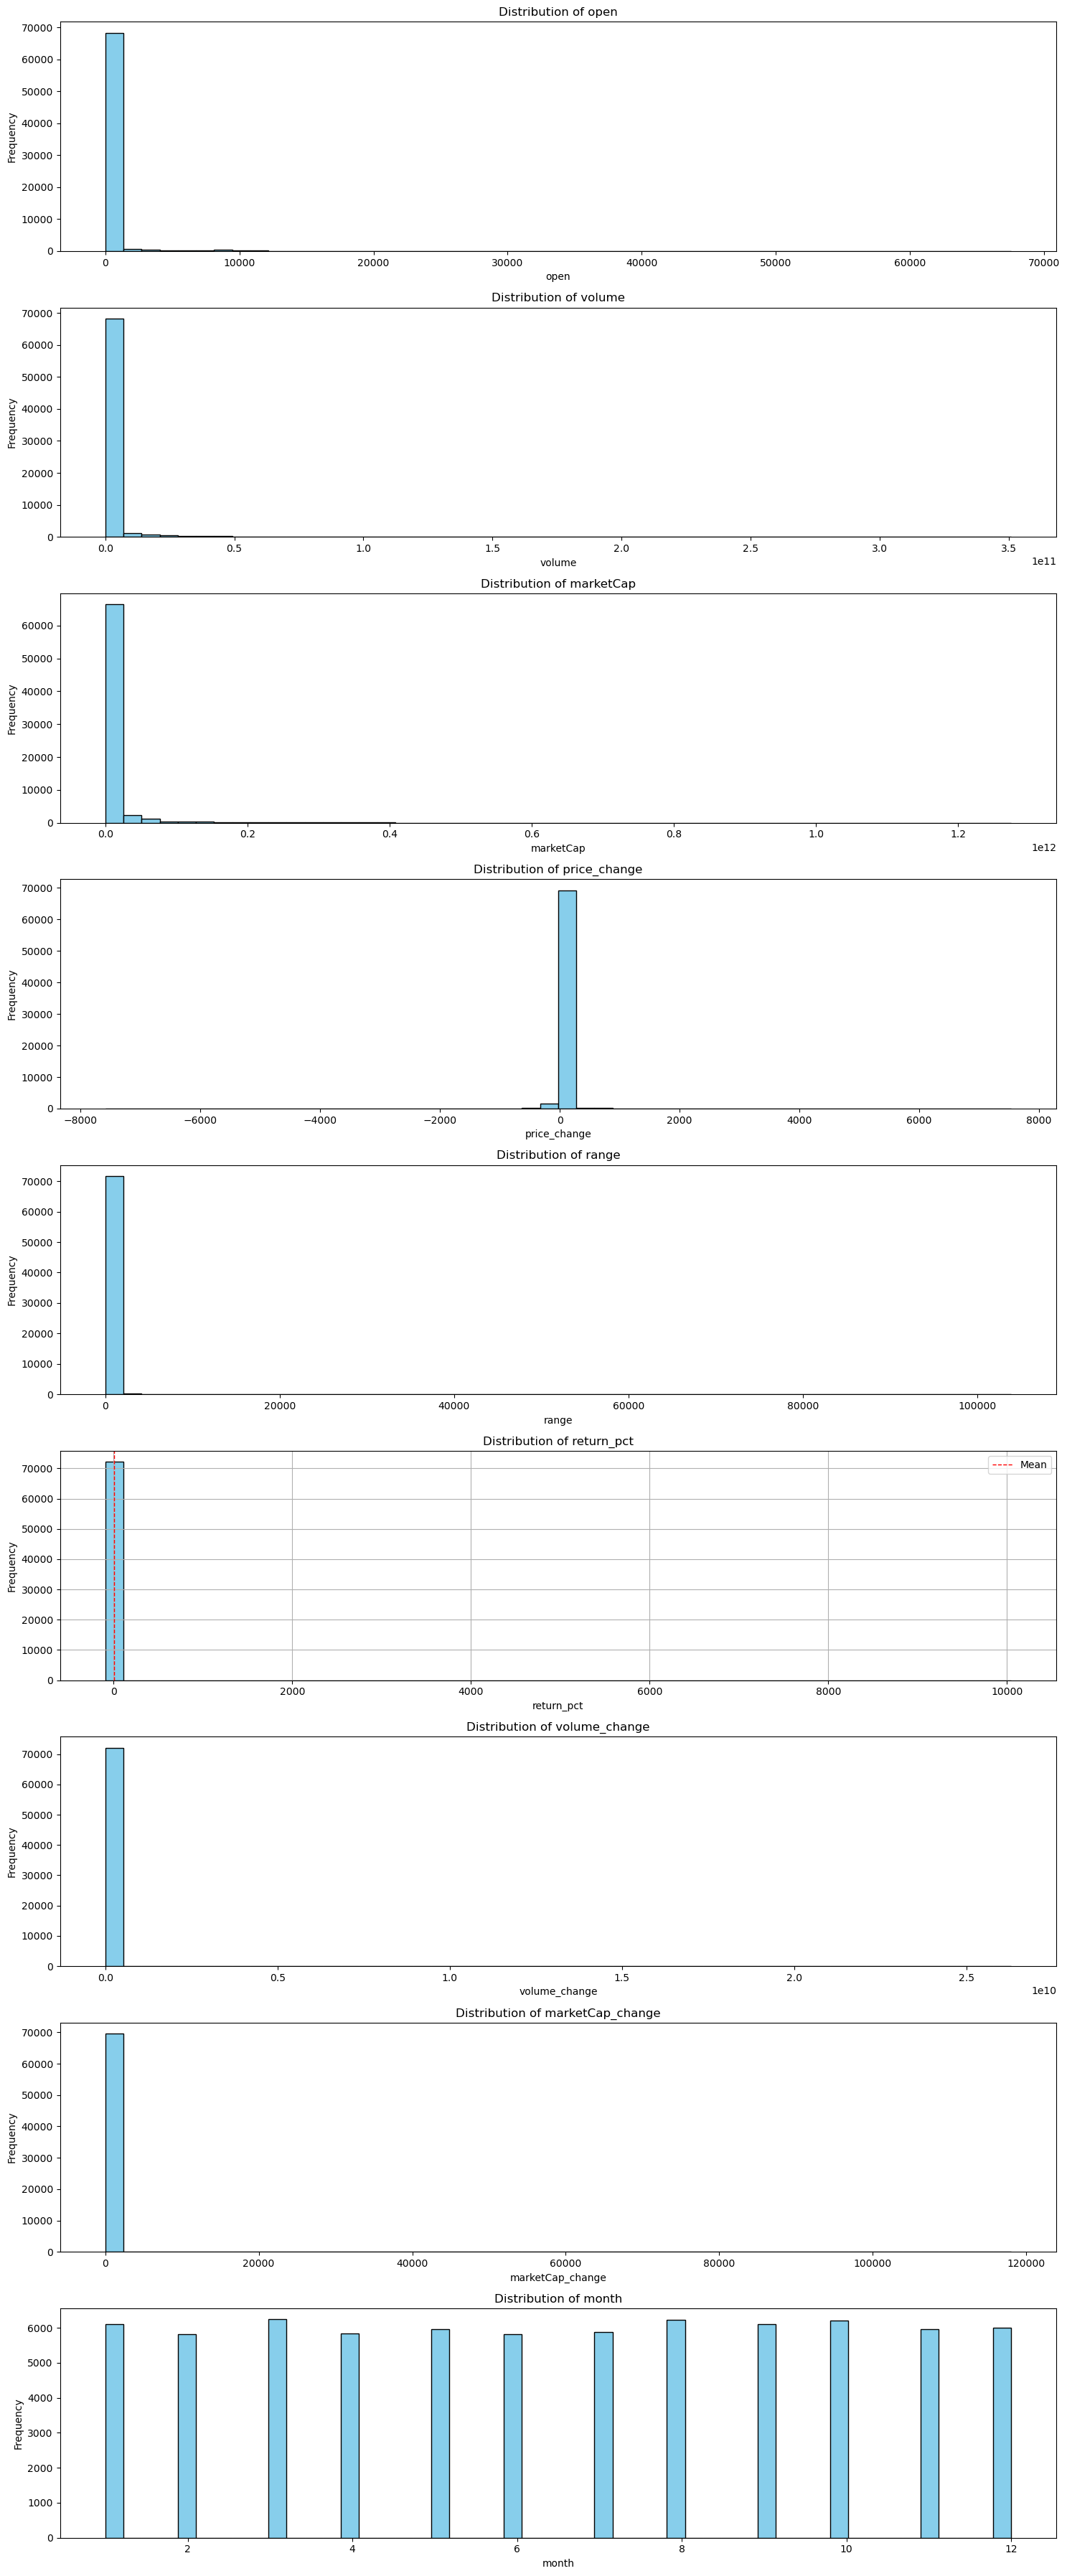

In [36]:

# List of numerical features to plot (adjust as needed)
numerical_features = [
    'open',  'volume', 'marketCap',
    'price_change', 'range', 'return_pct', 'volume_change', 'marketCap_change', 'month'
]

plt.figure(figsize=(15, len(numerical_features) * 4))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    
    # Clean data: remove NaN and infinite values
    clean_data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Plot histogram
    plt.hist(clean_data, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # If feature is 'return_pct', add a note about heavy tails
    if feature == 'return_pct':
        plt.grid(True)
        plt.axvline(x=clean_data.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
        plt.legend()
    
plt.tight_layout()
plt.show()



***

## Single Feature Distribution Analysis

Here, we summarize the key findings from the histograms of all major numerical features, with special attention paid to `return_pct` (returns):

### 1. **Price Features (`open`, `high`, `low`, `close`)**
- **Distribution:** All display heavily right-skewed distributions, with the majority of observations clustered at low prices and a long tail of much higher values.
- **Interpretation:** This is typical of cryptocurrency datasets, which include many low-priced coins and a few with extremely high valuations.

### 2. **Market Capitalization (`marketCap`)**
- **Distribution:** Extremely right-skewed, with the vast majority of coins having low market cap and a handful (like BTC, ETH) dominating with massive values.
- **Insight:** Highlights the highly unequal nature of value distribution in crypto markets.

### 3. **Volume**
- **Distribution:** Right-skewed, most coins and days have limited trading volume, with occasional days/coinsthat experience enormous trading spikes.
- **Interpretation:** Liquidity is sporadic and concentrated in a few top cryptocurrencies.

### 4. **Engineered Features**
- **Price Change/Range**: Also right-skewed or centered at zero but with long tails, reflecting both small daily moves for most assets and occasional extraordinary swings.
- **Return Percentage (`return_pct`):** Centered near zero but with fat tails—showing extreme daily gains or losses occur far more often than in normal distributions (heavy-tailed behavior), a hallmark of crypto markets.
- **Volume/MarketCap Change:** Clustered with most changes small, but sporadic large jumps or declines.

### 5. **Month**
- **Distribution:** Uniform/bar-shaped (1–12), as expected—no months are missing or over-represented after cleaning.

***

## Integrated Data Exploration and Analysis Report

### **1. Dataset Overview**
- Historical daily data for major cryptocurrencies, containing open, high, low, close, volume, marketCap, engineered features (returns, changes), and categorical (`crypto_name`).
- Period covers 2013–2022, enabling long-term trend and cycle analysis.

***

### **2. Data Cleaning and Feature Reduction**
- Removed non-numeric features, handled missing/infinite values for reliable plotting and statistics.
- Addressed and eliminated severe multicollinearity by dropping highly correlated price-related fields, ensuring a robust analytic feature set.

***

### **3. Univariate Analysis**
- Prices, volumes, and market caps are strongly right-skewed.
- Returns (`return_pct`) show heavy-tailed distributions—explosive gains/losses more common than in traditional finance.
- Cleaned features now provide unique information without redundancy.

***

### **4. Multivariate Analysis**
- Correlation heatmap and VIF analyses confirm:  
  - **OHLC prices and derivatives** were extremely collinear; after dropping redundant fields, multicollinearity is now low.
  - **MarketCap** loosely associated with price.
  - **Volume** and **returns** add orthogonal, unique signals.
  - **Time (month, date)** has minimal direct correlation with numeric features, supporting further time series analysis.

***

### **5. Bivariate/Group Visualizations**
- **Scatterplots** show price and market cap are loosely positively related, but high-volume days can occur at any price; big returns aren’t reliably linked with big volume spikes.
- **Time series plots** reveal pronounced market booms and busts, periods of increasing activity, and highly volatile exposure over the years.
- **Boxplots/violin plots**: 
  - Bitcoin dominates in price and liquidity, altcoins have greater return volatility (esp. Dogecoin).
- **Barplot**: Trading activity and liquidity are highly concentrated in the top assets.

***

### **6. Final Key Insights & Modeling Readiness**
- **Redundant feature removal** produces a clean, interpretable analytical dataset, suitable for regression, time series forecasting, or classification.
- **Heavy tails and volatility** are evident, suggesting models should account for risk and outlier behavior.
- **Diversified selection**: Remaining features each add distinct value, minimizing overfitting and maximizing interpretability.
- **Dataset is now robust, well-explored, and modeling-ready** for predicting volatility, price movement, or risk in cryptocurrency markets.

***

